# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# De la clase tenemos la función
def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

De la introducción podemos deducir las siguientes probabilidades:

- P(bowl_1) = 1/2 = 0.5
- P(bowl_2) = 1/2 = 0.5

- P(v | bowl_1) = 30/40 = 0.75
- P(c | bowl_1) = 10/40 = 0.25

- P(v | bowl_2) = 20/40 = 0.5
- P(c | bowl_2) = 20/40 = 0.5

In [10]:
# Tenemos dos bowls con la misma probabilidad de ser elegidos
priors = [1/2, 1/2]

# Dependen del % que representen las galletas de vainilla de nuestro interés en cada bolsita
likelihoods = [0.75, 0.5]

bowl1, bowl2 = bayes_rule(priors, likelihoods)

print(f'Probability of cookie being from bowl 1 given it is vanilla: {bowl1 * 100}%')

Probability of cookie being from bowl 1 given it is vanilla: 60.0%


What is the probability that it came from Bowl 2?

In [11]:
print(f'Probability of cookie being from bowl 2 given it is vanilla: {bowl2 * 100}%')

Probability of cookie being from bowl 2 given it is vanilla: 40.0%


What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [12]:
likelihoods = [0.25, 0.5]
bowl1, bowl2 = bayes_rule(priors, likelihoods)

print(f'Bowl 1:{round(bowl1 * 100,2)}%\nBowl 2:{round(bowl2 * 100,2)}%')

Bowl 1:33.33%
Bowl 2:66.67%


## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [14]:
# De nuevo es .5 por que hay 2 bolsas con la misma probabilidad
priors = [1/2, 1/2]

# Estas dependen del % y de como se seleccionen
# En la bolsa 1 el amarillo tiene 20% y el verde 10%
# En la bolsa 2 el amarillo tiene 14% y el verde 20%

# Nos interesa que el amarillo sea de la bolsa 1 (20%) y el verde de la bolsa 2 (20%)
# La otra opción sería que el amarillo sea de la bolsa 2 (14%) y el verde de la bolsa 1 (10%)

likelihoods = [(.2*.2*.5), (.1*.14*.5)]

bag1, bag2 = bayes_rule(priors, likelihoods)

print(f'Probability that the yellow one came from the Bag 1: {bag1 * 100}%')

Probability that the yellow one came from the Bag 1: 74.07407407407408%


What is the probability that the yellow candy came from Bag 2?

In [15]:
print(f'Probability that the yellow one came from the Bag 1: {bag2 * 100}%')

Probability that the yellow one came from the Bag 1: 25.925925925925924%


What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [16]:
priors = [1/2,1/2]
likelihoods = [(.1*.5), (.2*.5)]

bag1,bag2=bayes_rule(priors, likelihoods)

print(f'Bag 1:{bag1}\nBag 2:{bag2}')

Bag 1:0.3333333333333333
Bag 2:0.6666666666666666


## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [48]:
# Al inicio tenemos las 3 puertas con la misma proba
priors = [1/3,1/3,1/3]

# Si se abre la B su proba de tener el premio ahora es 0 y su parte se reparte en la opción restante
likelihoods =  [1/3, 0, 2/3]

p1, p2, p3 = bayes_rule(priors, likelihoods)

print(f'A:{p1}\nB:{p2}\nC:{p3}')

A:0.3333333333333333
B:0.0
C:0.6666666666666666


## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

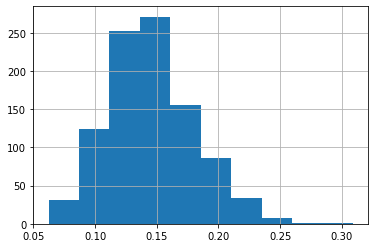

In [17]:
# Generamos los valores para el modelo a prior
n_draws = 100_000
prior = pd.Series(np.random.uniform(0, 1, size=n_draws))

# Para cada uno corremos una simulación de 100 visitantes
def generative_model(param):
    result = np.random.binomial(100, param)
    return result

sim_data = list()
for p in prior:
    sim_data.append(generative_model(p))

# De los modelos generados nos quedamos con los que cumplen los 14 exitos    
posterior = prior[list(map(lambda x: x == 14, sim_data))]
posterior.hist()
plt.show()

Produce a set of descriptive statistics for the posterior distribution.

In [55]:
posterior.describe()

count    945.000000
mean       0.148067
std        0.036472
min        0.059627
25%        0.122322
50%        0.143890
75%        0.173812
max        0.280661
dtype: float64

What is the 90% credible interval range?

In [18]:
print('(',posterior.quantile(.025), '|', posterior.quantile(.975),')')

( 0.08549836041727475 | 0.21910619644458987 )


What is the Maximum Likelihood Estimate?

In [19]:
rounded = posterior.round(2)
mode = rounded.mode()[0]
probability = list(rounded).count(mode)/len(rounded)
print('Maximum Likelihood Estimate: ', mode, '|',probability)

Maximum Likelihood Estimate:  0.14 | 0.12980269989615784
